In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# to divide train and test set
from sklearn.model_selection import train_test_split

In [3]:
# feature scaling
from sklearn.preprocessing import StandardScaler

In [4]:
# to build the models
from sklearn.linear_model import LinearRegression

In [5]:
# load dataset
data = pd.read_csv("Startups_data.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
# let's inspect the type of variables in pandas
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [16]:
data.shape

(50, 5)

In [7]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [8]:
# find numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 4 numerical variables


In [9]:
# let's visualise the values of the discrete variables
for var in ['State']:
    print(var, ' values: ', data[var].unique())

State  values:  ['New York' 'California' 'Florida']


### inspect for missing values

In [10]:
# let's visualise the percentage of missing values
data.isnull().mean()

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

### inspect for outliers values: <br>
1. make boxplots to visualise outliers in the continuous variables <br>
2. histograms to get an idea of the distribution

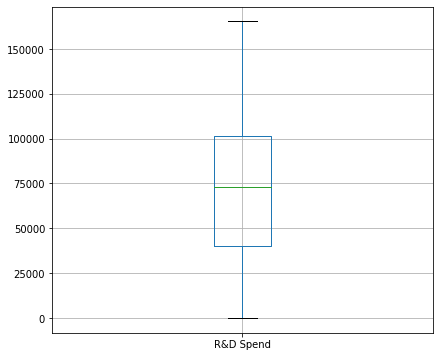

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='R&D Spend') #Administration #Marketing_Spend 
plt.show()

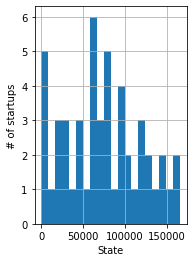

In [12]:
plt.subplot(1, 2, 2)
fig = data['R&D Spend'].hist(bins=20) #Administration #Marketing_Spend
fig.set_ylabel('# of startups')
fig.set_xlabel(var)
plt.show()

### Outlies in discrete variables are values that are present in less than 1%

In [13]:
# outlies in discrete variables
for var in ['State']:
    print(data[var].value_counts() / np.float(len(data)))
    print()

New York      0.34
California    0.34
Florida       0.32
Name: State, dtype: float64



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


### Separate train and test set

In [14]:
# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.Profit, test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((40, 4), (10, 4))

### Encode categorical variables

In [17]:
# drop_first=True to avoid multicollinearity
X_train=pd.get_dummies(X_train,columns=categorical,drop_first=True)
X_test=pd.get_dummies(X_test,columns=categorical,drop_first=True)

In [18]:
#let's inspect the dataset
X_train.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
33,55493.95,103057.49,214634.81,1,0
35,46014.02,85047.44,205517.64,0,1
26,75328.87,144135.98,134050.07,1,0
34,46426.07,157693.92,210797.67,0,0
18,91749.16,114175.79,294919.57,1,0


In [19]:
y_train

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64

### Feature importance and selection

In [20]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

 1) Administration                 0.303063
 2) Marketing Spend                0.293436
 3) R&D Spend                      0.287000
 4) State_New York                 0.062173
 5) State_Florida                  0.054329


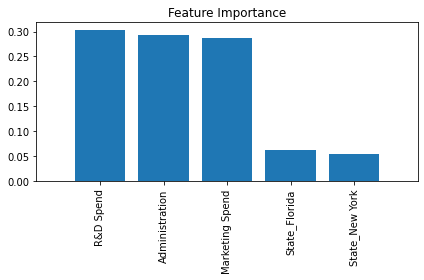

In [21]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = ['R&D Spend','Administration','Marketing Spend','State_Florida','State_New York']

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [22]:
X_train = X_train.iloc[:,:-2]
X_test = X_test.iloc[:,:-2]

In [23]:
y_train = lab_enc.inverse_transform(y_train)

### Feature scaling

In [24]:
# fit scaler
scaler = StandardScaler() # create an instance
scaler.fit(X_train) #  fit  the scaler to the train set for later use

StandardScaler()

### Model Training

In [25]:
lin_model = LinearRegression()
lin_model.fit(scaler.transform(X_train), y_train)

LinearRegression()

### Model evaluation

In [26]:
pred = lin_model.predict(scaler.transform(X_test))

In [27]:
SS_Residual = sum((y_test-pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)

In [28]:
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [29]:
print(r_squared)
print(adjusted_r_squared)

0.939395591782057
0.9090933876730856
